In [31]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
df = pd.read_table('Data_28_F29.txt', delimiter=',')

In [3]:
df.head()

,FID,ID,FIELD,OID_1,YLD00,YLD01,YLD02,YLD03,AVGYLD,ELE,...,M3_00,M3_01,M3_02,M3_03,M3_AV,CL_AV,CL_00,CL_01,CL_02,CL_03
0,0,3018,C29,3017,1012.799988,1201.900024,943.599976,1082,1060.099976,1080.06,...,3.0,3.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0
1,1,3019,C29,3018,930.000000,1352.000000,1033.099976,1202,1129.199951,1080.08,...,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0
2,2,3020,C29,3019,902.000000,1389.400024,1073.699951,1196,1140.300049,1080.10,...,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0
3,3,3021,C29,3020,931.900024,1348.099976,1042.400024,1120,1110.599976,1080.13,...,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0
4,4,3022,C29,3021,885.000000,1301.199951,978.400024,1119,1070.800049,1080.18,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0


In [74]:
columns = ['FID', 'ID','FIELD','YLD00','YLD01','YLD02','YLD03','AVGYLD','ELE','SLOPE','CURV',
           'PRO','PLAN','EC_SH','EC_DP','BAND1','BAND2','BAND3','BAND4','VI00_520','VI00_528',
           'VI00_613','VI00_707','VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917',
           'VI01_616','VI01_624','VI01_710','VI01_827','VI01_912','VI02_518','VI02_526','VI02_619',
           'VI02_713','VI02_721','VI02_830','VI02_907','VI02_923','VI03_505','VI03_529','VI03_606',
           'VI03_622','VI03_724','VI03_825','VI03_926']
ndvi_cols = ['VI00_520','VI00_528',
           'VI00_613','VI00_707','VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917',
           'VI01_616','VI01_624','VI01_710','VI01_827','VI01_912','VI02_518','VI02_526','VI02_619',
           'VI02_713','VI02_721','VI02_830','VI02_907','VI02_923','VI03_505','VI03_529','VI03_606',
           'VI03_622','VI03_724','VI03_825','VI03_926']
band_cols = ['BAND1','BAND2','BAND3','BAND4']
yld_cols = ['YLD00','YLD01','YLD02','YLD03','AVGYLD']

In [5]:
df[columns].describe()

,FID,ID,YLD00,YLD01,YLD02,YLD03,AVGYLD,ELE,SLOPE,CURV,...,VI02_830,VI02_907,VI02_923,VI03_505,VI03_529,VI03_606,VI03_622,VI03_724,VI03_825,VI03_926
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,...,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,487.000000,2857.542564,907.885437,1253.264923,943.772410,930.962051,1008.962668,1080.427949,0.246383,0.000196,...,0.320109,0.214965,0.016917,-0.097203,-0.232391,-0.180239,-0.181062,-0.050577,0.093044,0.075182
std,281.602557,792.151212,213.261213,218.544305,246.310259,233.437893,186.826414,0.537060,0.168585,0.015932,...,0.109565,0.098675,0.070082,0.064934,0.007854,0.013361,0.020833,0.067392,0.064712,0.092275
min,0.000000,1363.000000,272.899994,627.000000,209.399994,346.000000,372.399994,1079.050000,0.032900,-0.083774,...,-0.060870,-0.160000,-0.165354,-0.227273,-0.260000,-0.220779,-0.225532,-0.194915,-0.165644,-0.128440
25%,243.500000,2158.500000,780.500000,1118.100037,806.099976,775.000000,918.199982,1080.120000,0.129450,-0.006467,...,0.272233,0.151515,-0.035176,-0.148936,-0.237410,-0.189065,-0.194313,-0.112741,0.051282,0.005291
50%,487.000000,2959.000000,906.799988,1256.599976,991.000000,938.000000,1027.400024,1080.400000,0.199300,0.000334,...,0.340909,0.229885,0.016216,-0.089744,-0.232472,-0.179191,-0.183673,-0.032258,0.093333,0.071038
75%,730.500000,3546.500000,1061.599976,1389.100037,1115.400024,1087.000000,1139.600037,1080.760000,0.318300,0.007187,...,0.395604,0.285714,0.067416,-0.051414,-0.227273,-0.170984,-0.171053,0.005348,0.139959,0.144578
max,974.000000,4083.000000,1515.400024,1833.000000,1623.500000,1556.000000,1470.400024,1081.960000,1.499200,0.120556,...,0.497326,0.393939,0.181818,0.059603,-0.208511,-0.084337,-0.038835,0.071823,0.248322,0.309091


In [161]:
whole_df = df[columns]

In [6]:
df['FIELD'].unique()

array(['C29', 'C28'], dtype=object)

In [7]:
len(df)

975

In [8]:
ndvi = df[ndvi_cols]

In [9]:
ndvi_stack = ndvi.stack()

In [10]:
ndvi_stack_df = pd.DataFrame(ndvi_stack).reset_index()

In [11]:
ndvi_stack_df.rename(columns = {'level_0': 'FID', 'level_1': 'time', 0: 'NDVI'}, inplace=True)

In [12]:
ndvi_stack_df.head()

,FID,time,NDVI
0,0,VI00_520,-0.2174
1,0,VI00_528,-0.1848
2,0,VI00_613,-0.1341
3,0,VI00_707,0.1712
4,0,VI00_715,0.2242


In [13]:
ndvi_final = pd.merge(ndvi_stack_df, df[['FID', 'FIELD']], on='FID', how='left')

In [14]:
ndvi_final.head()

,FID,time,NDVI,FIELD
0,0,VI00_520,-0.2174,C29
1,0,VI00_528,-0.1848,C29
2,0,VI00_613,-0.1341,C29
3,0,VI00_707,0.1712,C29
4,0,VI00_715,0.2242,C29


In [15]:
def time_convert(r):
    year, month_day = r.split('_')
    year = '20' + year[2:]
    month_day = month_day if len(month_day) == 4 else '0' + month_day
    month_day = month_day[:2] + '-' + month_day[2:]
    return pd.to_datetime(year + '-' + month_day)

In [16]:
ndvi_final['time'] = ndvi_final['time'].apply(time_convert)

In [75]:
ndvi_final['year'] = ndvi_final['time'].apply(lambda r: str(r.year))
ndvi_final['month'] = ndvi_final['time'].apply(lambda r: str(r.month))
ndvi_final['day'] = ndvi_final['time'].apply(lambda r: str(r.day))

In [76]:
ndvi_final.head()

,FID,time,NDVI,FIELD,year,month,day
0,0,2000-05-20,-0.2174,C29,2000,5,20
1,0,2000-05-28,-0.1848,C29,2000,5,28
2,0,2000-06-13,-0.1341,C29,2000,6,13
3,0,2000-07-07,0.1712,C29,2000,7,7
4,0,2000-07-15,0.2242,C29,2000,7,15


In [163]:
len(ndvi_final)

29250

In [103]:
ndvi_final_by_month = ndvi_final.groupby(['FIELD', 'year', 'month']).NDVI.mean()
ndvi_final_by_month_df = pd.DataFrame(ndvi_final_by_month).reset_index()
# ndvi_final_by_month_df.loc[-1] = ['C28', '2000', '5', 0]
# ndvi_final_by_month_df['month_day'] = ndvi_final_by_month_df['month']+'-'+ndvi_final_by_month_df['day']
ndvi_final_by_month_df.head()


,FIELD,year,month,NDVI
0,C28,2000,5,-0.212915
1,C28,2000,6,-0.163994
2,C28,2000,7,0.147379
3,C28,2000,8,0.323388
4,C28,2000,9,0.137025


In [104]:
len(ndvi_final_by_month_df)

38

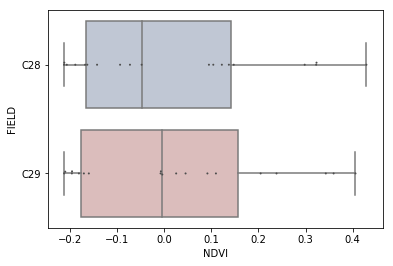

In [105]:
sns.boxplot(x="NDVI", y="FIELD", data=ndvi_final_by_month_df,
            whis=np.inf, palette="vlag")
sns.swarmplot(x="NDVI", y="FIELD", data=ndvi_final_by_month_df,
              size=2, color=".3", linewidth=0)


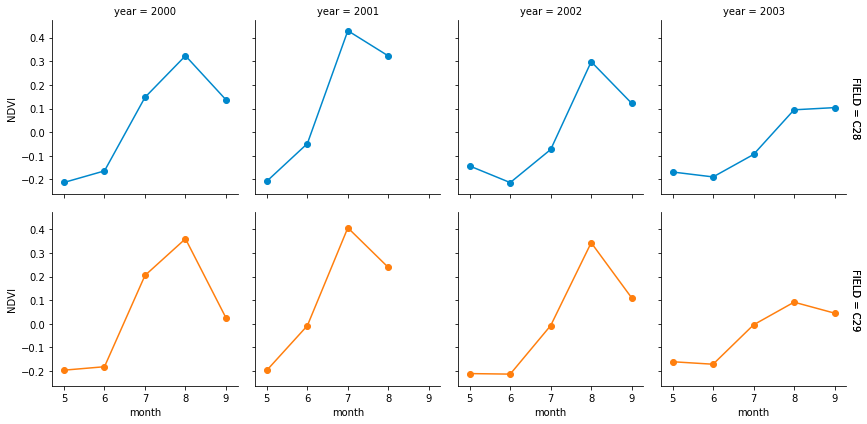

In [158]:
g = sns.FacetGrid(ndvi_final_by_month_df, row="FIELD", col="year", hue='FIELD', palette=sns.color_palette(colors), margin_titles=True)
# bins = np.linspace(0, 60, 13)
g.map(plt.scatter, "month", 'NDVI')
g.map(plt.plot, "month", 'NDVI')
# g.set_xticklabels(rotation=45)

In [40]:
ndvi_final_by_FID = ndvi_final.groupby(['FIELD']).NDVI.mean()
ndvi_final_by_FID_df = pd.DataFrame(ndvi_final_by_FID).reset_index()

In [42]:
ndvi_final_by_FID_df.head()

,FID,FIELD,NDVI
0,0,C29,0.018889
1,1,C29,0.045019
2,2,C29,0.051234
3,3,C29,0.053147
4,4,C29,0.042650


In [60]:
band = df[band_cols]
band.describe()

,BAND1,BAND2,BAND3,BAND4
count,975.000000,975.000000,975.000000,975.000000
mean,94.360000,94.554872,136.832821,90.221538
std,10.357007,17.844377,37.275622,19.771595
min,78.000000,73.000000,83.000000,58.000000
25%,88.000000,84.000000,112.000000,76.000000
50%,92.000000,87.000000,125.000000,83.000000
75%,98.000000,99.000000,147.000000,96.000000
max,129.000000,156.000000,258.000000,153.000000


In [64]:
band_stack = band.stack()
band_stack_df = pd.DataFrame(band_stack).reset_index()
band_stack_df.head()

,level_0,level_1,0
0,0,BAND1,96
1,0,BAND2,84
2,0,BAND3,123
3,0,BAND4,82
4,1,BAND1,94


In [66]:
band_stack_df.rename(columns = {'level_0': 'FID', 'level_1': 'band', 0: 'value'}, inplace=True)
band_stack_df.head()

,FID,band,value
0,0,BAND1,96
1,0,BAND2,84
2,0,BAND3,123
3,0,BAND4,82
4,1,BAND1,94


In [67]:
band_final = pd.merge(band_stack_df, df[['FID', 'FIELD']], on='FID', how='left')

In [68]:
band_final.head()

,FID,band,value,FIELD
0,0,BAND1,96,C29
1,0,BAND2,84,C29
2,0,BAND3,123,C29
3,0,BAND4,82,C29
4,1,BAND1,94,C29


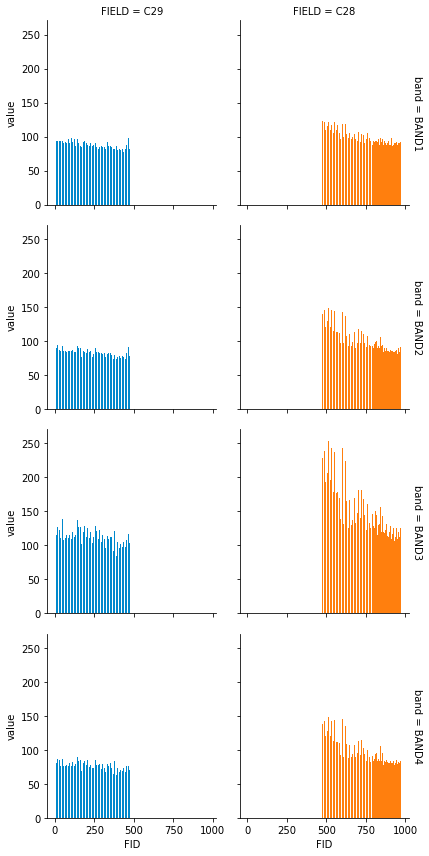

In [155]:
colors = ["#0088cc", "#ff7f0e"]
g = sns.FacetGrid(band_final, row="band", col="FIELD", hue='FIELD', palette=sns.color_palette(colors), margin_titles=True)
# # bins = np.linspace(0, 60, 13)
g.map(plt.bar, "FID", 'value')

In [150]:
yld = df[yld_cols]
yld_stack = yld.stack()
yld_stack_df = pd.DataFrame(yld_stack).reset_index()
yld_stack_df.rename(columns = {'level_0': 'FID', 'level_1': 'time', 0: 'value'}, inplace=True)
yld_stack_df.head()

,FID,time,value
0,0,YLD00,1012.799988
1,0,YLD01,1201.900024
2,0,YLD02,943.599976
3,0,YLD03,1082.000000
4,0,AVGYLD,1060.099976


In [151]:

yld_final = pd.merge(yld_stack_df, df[['FID', 'FIELD']], on='FID', how='left')
# yld_final['time'] = yld_final['time'].apply(time_convert)
# yld_final['year'] = yld_final['time'].apply(lambda r: str(r.year))
# yld_final['month'] = yld_final['time'].apply(lambda r: str(r.month))
yld_final.head()


,FID,time,value,FIELD
0,0,YLD00,1012.799988,C29
1,0,YLD01,1201.900024,C29
2,0,YLD02,943.599976,C29
3,0,YLD03,1082.000000,C29
4,0,AVGYLD,1060.099976,C29


In [118]:
len(yld_final)

4875

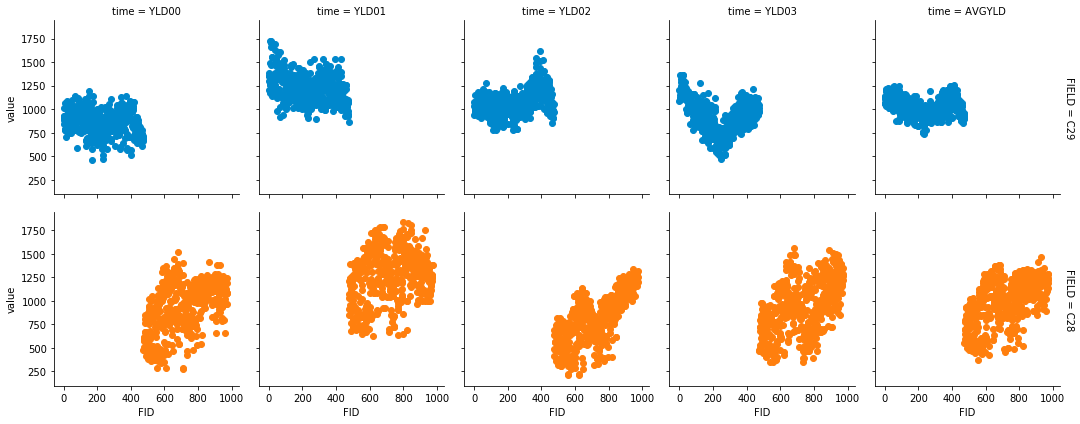

In [156]:
g = sns.FacetGrid(yld_final, row="FIELD", col="time", hue='FIELD', palette=sns.color_palette(colors), margin_titles=True)
g.map(plt.scatter, "FID", 'value')

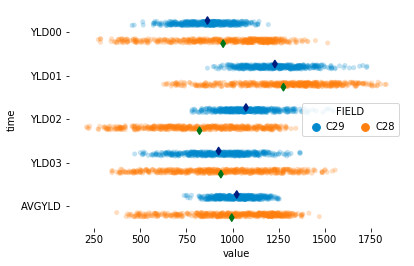

In [160]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
sns.stripplot(x="value", y="time", hue="FIELD",
              data=yld_final, dodge=True, jitter=True,palette=sns.color_palette(colors),
              alpha=.25, zorder=1)

sns.pointplot(x="value", y="time", hue="FIELD",
              data=yld_final, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2], title="FIELD",
          handletextpad=0, columnspacing=1,
          loc="right", ncol=3, frameon=True)

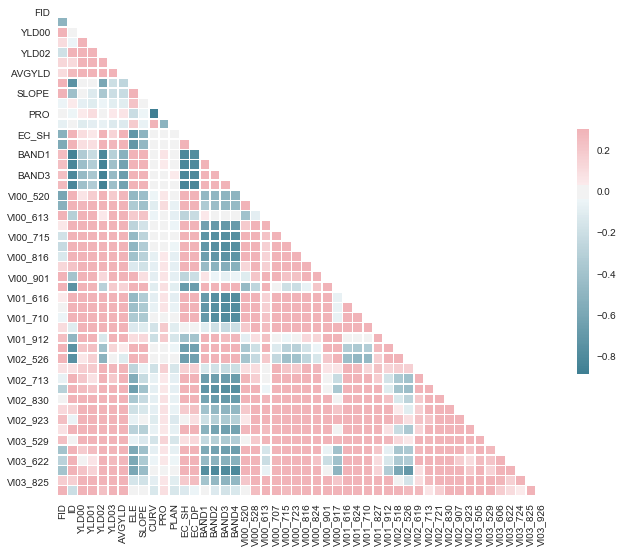

In [162]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = whole_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})